Quando definimos a Transformada discrete de Fourier, observamos que o sinal obtido pela tranasformada inversa $\hat{x}(n)$ é periódico com período N, e que deve-se tomar as $N$ primeiras amostras para representar o sinal original.

Pelas propriedades da Trnasformada de Fourier, se $X[k]$ é a Transformada de Fourier no Tempo Discreto de $x(n)$, então $e^{-j\frac{2\pi k}{N}m}X[k]$ é a Transformada de Fourier de $x(n-m)$. Porém como $\hat{x}(n)$ é periódica, o deslocamento será circular, ou seja obtemos $x_1(n) = x[(n-m)\mod N]$

<StemContainer object of 3 artists>

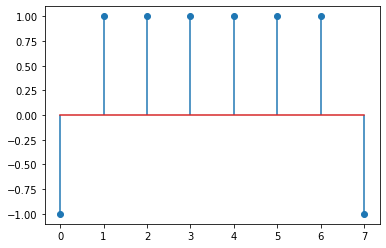

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

L = 5 #Tamanho da janela
N = 8 #Tamanho da FFT

x = [1, 1, 1, 1, 1, 1, -1, -1]

#plt.stem(x,label='xn)',use_line_collection=True,)

Xk = scp.fft(x,N)

m = 1 #Deslocamento

for k in range(0,N):
    Xkm[k] = Xk[k]*np.exp(-1j*2*np.pi*k*m/N)
 
xhat = scp.ifft(Xkm,N)

plt.stem(np.real(xhat),label='x recuperado)',use_line_collection=True,)



Dados dois sinais, $x(n)$ e $h(n)$ podemos realizar sua convolução obtendo DFT de cada, $X(k)$ e $H(k)$, multiplicando o aplicando a tranformada inversa.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


<StemContainer object of 3 artists>

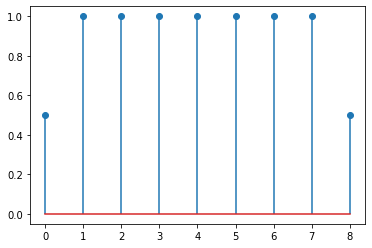

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

L = 5 #Tamanho da janela
N = 8 #Tamanho da FFT

x = [1, 1, 1, 1, 1, 1, 1, 1]

h = [0.5, 0.5]

#plt.stem(x,label='xn)',use_line_collection=True,)

Xk = scp.fft(x,N)
Hk = scp.fft(h, N)

Yk = np.zeros(N)

for i in range(0,N):
    Yk[i] = Xk[i]*Hk[i]
    
y = scp.ifft(Yk,N)

#plt.stem(np.real(y),label='x recuperado)',use_line_collection=True,)

y_linear = np.convolve(x, h)

plt.stem(np.real(y_linear),label='x recuperado)',use_line_collection=True,)


## Filtro Casado

Embora ainda não tenhamos estutado of filtros digitais, com o conhecimento adquirido sobre convolução, podemos analisar uma estrtura bastante utilizada em receptores e detectores de sinais que são os filtros casados(do inglês matched filters).

Inicialmente vamos considerar um sinal $x(n)$ de duração finita com $N$ pontos, e cuja transformda de Fourier é dada por $X(k).$ Queremos obter um sinal $h(n)$ cuja convolução com $x(n)$ produza o valor máximo quando os sinais estiver sobrepostos (ou casados).

Para tanto faremos vamos começar no tempo contínuo, considerando que o sinal $x(t)$ tem transformada $X(j\Omega)$, e duratção $T$ instantes de tempo. O filtro que queremos temo formato $$H(j\Omega) = X^*(j\Omega)e^{j2\pi f T},$$ sendo $*$ o conjugado complexo. No tempo discreto podemos escrever $$H(k) = X^*(k)e^{-j2k\pi F_s T/N},$$ sendo $F_s$ a frequência de amostragem. Pode-se mostrar que o período de duração do sinal $T$, terá $(N-1)/F_s$ amostras, assim $$H(k) = X^*(k)e^{-j2k\pi F_s (N-1)/Fs/N} = X^*(k)e^{-j2k\pi (N-1)/N},$$
aplicando a transformada inversa chegamos a $$h(n) = x(N - n -1),$$ ou seja, o filtro que queremos é uma versão de $x(n)$ intertida no tempo a atrasada de $N$ amostras.

Como exemplo, seja $x(n)$ e o respectivo filtro casado $h(n)$ representados nas Figuras abaixo

![title](img/sinaisMF.png)

A convolução de desses sinais prodirá o sinal $y(n)$

![title](img/SaidaMF.png)


cujo pico ocorre exatamente quando os sinais estiverem casados.



Uma das aplicações do filtro casado é determinar a presença do sinal quando há ruído. Por exemplo, considere que o sinal $x(n)$ apresentado acima é contaminado com um rurído gaussiano gerando $\eta(n)$ gerando o sinal $x_1(n) = x(n) + \eta(n)$ mostrad a seguir.

[ 1.03925431  0.13508066 -0.1601541   0.52167668  0.35799396]


<StemContainer object of 3 artists>

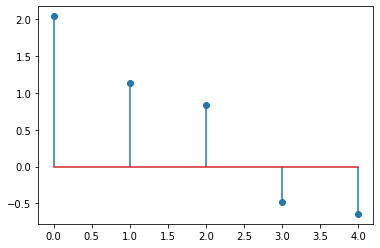

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

L = 5 #Tamanho da janela
N = 8 #Tamanho da FFT

x = [1, 1, 1, -1, -1]

eta = np.random.normal(0, 0.5, 5)

x1 = x + eta

plt.stem(x1,label='xn)',use_line_collection=True,)


Aplicando o filtro casado ao sinal $x1(n)$ obtemos

<StemContainer object of 3 artists>

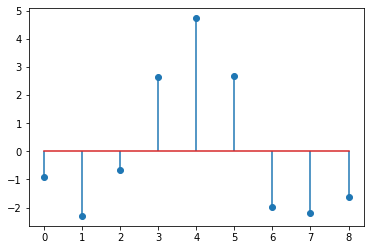

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

L = 5 #Tamanho da janela
N = 8 #Tamanho da FFT

x = [1, 1, 1, -1, -1]

eta = np.random.normal(0, 0.5, 5)

x1 = x + eta

h = [-1, -1, 1, 1, 1]

y = np.convolve(x1, h)

plt.stem(y,label='xn)',use_line_collection=True,)

Outra aplicação para os filtros casados é determinar na recepção, dentre um conjunto possíveis sinais qual foi o transmitido. Para tanto usa-se a estrtutura

![title](img/EstruturaMF.png)


no qual o sinal recebido passa por vários filtros, cada um casado com o sinal transmitido. O fitro que produzir a maior energia na saída, indica com maior certeza qual sinal foi transmitido.


No exemplo a seguir é possível transmitir $x1(n)$, $x2(n)$ ou $x3(n)$, no receptor, tem-se três filtros cujas saídas são comparadas para determinar qual sinal foi transmitido.

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

def somalista(numeros):
    soma = 0
    for x in numeros:
        soma = x*x + soma
    return soma

x1 = [1, 1, 1, -1, -1]
h1 = [-1, -1, 1, 1, 1]

x2 = [1, 1, 1, 1, 1]
h2 = [1, 1, 1, 1, 1]

x3 = [2, 0, 0, 1, 1]
h3 = [1, 1, 0, 0, 2]

# Descomentar para adicionar ruído Gaussiano
eta = np.random.normal(0, 0.45, 5)

# Sinal recebido
r = x3

# Descomentar para adicionar ruído Gaussiano
r = r + eta

y1 = np.convolve(r, h1)
y2 = np.convolve(r, h2)
y3 = np.convolve(r, h3)

e1 = somalista(y1)
e2 = somalista(y2)
e3 = somalista(y3)


if (e1>e2) and (e1>e3):
    print('Transmitido x1')
elif (e2>e1) and (e2>e3):
    print('Transmitido x2')
else:
    print('Transmitido x3')

#plt.stem(y,label='xn)',use_line_collection=True,)

Transmitido x2


Como outra aplicação da convolução temos a multiplicação de polinômios. Vamos fazer a multiplicação dos polinômios $p(x) = 1 + x + x^2$ e $q(x) = 2 - x - x^2$.

Vimos que para obter a convolução linear de dois sinais $x(n)$ de comprimento $M$ e $h(n)$ de comprimento $L$ no tempo discreto temos que fazê-los ter comprimento $N = M + L -1$.
A convolução é normalmente utilizadas para filtragem, então um dos sinais tem comprimento finito, entretanto, o outro sinal pode ter comprimento infinito é necessário particioná-la em blocos para realizar a convolução. Consideremos que $x(n)$ tem comprimento muito grande comparado com $h(n)$, então podemos particionar fazendo
$$
x_m(n) = \left\{\begin{array}{c c} X(n - mM_0) & para\ 0 \leq n \leq M-1\ e\ m=0, 1, 2, 3, .... \\ 0, & c.c \end{array}\right.
$$

Dessa forma fazendo $N = M_0 + L -1$ tem-se 
$$
y_m(n) = \sum_{k=0}^{N-1}x_m(k)h(n-k),\ para\ 0 \leq n \leq N-1
$$
como a convolução do $m$ bloco de $x(n)$ com $h(n)$. A sequência de entrada pode ser escrita como
$$
x(n) = \sum_{m}^{\infty}x_m(n - mM_0)
$$
e pelo princípio da sobreposição
$$
y(n) = \sum_{m}^{\infty}y_m(n - mM_0)
$$

Como $N = M + L -1 > M$ então haverá sobreposições dos sucessivos $y_m(n)$, essa sobreposições precisam ser somadas, dai surge o método overlapp and add.


![title](img/DinizSlidesFig4.png)


Sejam os sinais $x(n) = \{1, -1, 1, -1, 1, -1, 1, -1, 1, -1\}$ e $h(n) = \{1, 1\}$. Vamos analisar a convolução $x(n)*h(n)$.

Exercício: Seja o sinal  (ver arquivo filtroMedia.m)
$$
x(n) = \cos(2\pi n/21)
$$
que é adicionado a interferência
$$
\eta(n) = 0,2*(-1)^n\delta(n)
$$
produzindo $r(n) = x(n) + \eta(n)$.
Faça a convolução de $r(n)$ com o filtro $h(n) = \frac{1}{2}\delta(0) + \frac{1}{2}\delta(1)$, pelo menos 5096 amostras de $r(n)$ sendo processadas em blocos de $M_0 = 128$. Desenhe em um mesmo gráfico $r(n)$ e o resultado da convolução.